#  ДЗ еще делается

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Теперь решаем задачу регрессии - предскажем цены на недвижимость.

Использовать датасет https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv)

Данных немного, поэтому необходимо использовать 10-fold кросс-валидацию для оценки качества моделей

Построить случайный лес, вывести важность признаков

Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

Для валидации модели 2-го уровня использовать отдельный hold-out датасет, как на занятии

Показать, что использование ансамблей моделей действительно улучшает качество (стекинг vs другие модели сравнивать на hold-out)

В качестве решения: Jupyter notebook с кодом, комментариями и графикам

In [160]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [161]:
train_col_set = set(df_train.columns)
test_col_set = set(df_test.columns)
train_col_set - test_col_set

{'SalePrice'}

In [162]:
cat_cols = df_train.columns[df_train.dtypes == object]
num_cols = df_train.columns[df_train.dtypes != object]

In [163]:
df_test['SalePrice'] = -1
df_train['is_train'] = 1
df_test['is_train'] = 0

In [164]:
df = pd.concat([df_train, df_test])

In [165]:
df.set_index('Id', inplace=True)

In [166]:
pd.options.display.max_rows = 90
df.head().T

Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 81 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

Для начала рассмотрим неполные признаки

In [168]:
# количество пропущенных значений для каждого из признаков
df.isna().sum()[df.isna().sum()>0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [169]:
# неполные признаки
not_full_colls = sorted(list(df.columns[df.isna().sum()>0]))
not_full_colls

['Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'KitchenQual',
 'LotFrontage',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'PoolQC',
 'SaleType',
 'TotalBsmtSF',
 'Utilities']

In [170]:
sorted(df.columns)

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

In [171]:
# для следующих признаков заполним отсутствующие значения наиболее часто встречающимися
mode_cols = ['Electrical', 'Functional', 'MSZoning', 'SaleType', 'Utilities']

for col in mode_cols:
    df.loc[df[col].isna(), col] = df[col].mode()[0]

not_full_colls = [col for col in not_full_colls if col not in mode_cols]

In [172]:
# в датасете имеется множество сопряженных признаков, например относящихся к гаражу, подвалу и др.
# рассмотрим признаки с отсутствующими значениями, не имеющими сопряженных признаков.
single_not_full_cols = ['Alley', 'Fence', 'MiscFeature']

In [173]:
for col in single_not_full_cols:
    print(df[col].value_counts(dropna=False))

NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64
NaN      2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64
NaN     2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64


In [174]:
# отсутствие значения означает отсутствие данного признака. Заполним отсутсвтующие значения строками 'to_drop',
# для того, чтобы после преобразования категориальных переменных в dummies, удалить столбцы, содержащие to_drop.
# т.к. значение 0 для каждого из сопряженных признаков уже будет говорить об отсутсвии этого признака.
for col in single_not_full_cols:
    df.loc[df[col].isna(), col] = 'to_drop'
    
not_full_colls = [col for col in not_full_colls if col not in single_not_full_cols]

In [175]:
# рассмотрим признаки относящиеся к бассейну и их влияние на цену (на обучающем наборе).
df.loc[df['PoolArea']>0, ['PoolArea', 'SalePrice', 'PoolQC']].sort_values('PoolArea')

,PoolArea,SalePrice,PoolQC
Id,,,
1975,144,-1,Ex
2574,228,-1,Ex
2421,368,-1,NaN
2504,444,-1,NaN
1299,480,160000,Gd
198,512,235000,Ex
1387,519,250000,Fa
1183,555,745000,Ex
2600,561,-1,NaN


В целом у площади бассейна и ценой недвижимости - прямая зависимость. Только один объект сильно выбивается из общей картины (цена значительно выше, чем у других объектов с бассейном). Признак PoolQC не выглядит полезным, т.к. совершенно не коррелирует с ценой. Поэтому удалим его.

In [176]:
df.drop('PoolQC', axis=1, inplace=True)
not_full_colls.remove('PoolQC')

In [177]:
# рассмотрим признаки относящиеся к гаражу.
garage_cols = [col for col in df.columns if 'Garage' in col]
df[garage_cols].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
1,Attchd,2003.0,RFn,2.0,548.0,TA,TA
2,Attchd,1976.0,RFn,2.0,460.0,TA,TA
3,Attchd,2001.0,RFn,2.0,608.0,TA,TA
4,Detchd,1998.0,Unf,3.0,642.0,TA,TA
5,Attchd,2000.0,RFn,3.0,836.0,TA,TA


In [178]:
df[garage_cols].isna().sum()

GarageType      157
GarageYrBlt     159
GarageFinish    159
GarageCars        1
GarageArea        1
GarageQual      159
GarageCond      159
dtype: int64

In [179]:
df.loc[(df['GarageFinish'].isna()) & (df['GarageType'].notna()), garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
2127,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
2577,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
df.loc[[2127, 2577], 'GarageFinish'] = 'Unf'
df.loc[[2127, 2577], 'GarageQual'] = df['GarageQual'].mode()[0]
df.loc[[2127, 2577], 'GarageCond'] = df['GarageCond'].mode()[0]
df.loc[2577, ['GarageCars', 'GarageArea']] = df.loc[2127, ['GarageCars', 'GarageArea']]

Заполним отсутствующие значения категориальных признаков 'to_drop'. <br>
Пропущенные GarageYrBlt заполним значениями из YerBuilt.

In [181]:
df.loc[df['GarageType'].isna(), ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = 'to_drop'
df.loc[df['GarageYrBlt'].isna(), 'GarageYrBlt'] = df.loc[df['GarageYrBlt'].isna(), 'YearRemodAdd']
not_full_colls = [col for col in not_full_colls if col not in garage_cols]

In [182]:
# заполним отсутствующие значения LotFrontage нулями
df.loc[df['LotFrontage'].isna(), 'LotFrontage'] = 0
not_full_colls.remove('LotFrontage')

In [183]:
# рассмотрим признаки относящиеся к кирпичной кладке.
mas_cols = [col for col in df.columns if 'Mas' in col]
df[mas_cols].head()

,MasVnrType,MasVnrArea
Id,,
1,BrkFace,196.0
2,None,0.0
3,BrkFace,162.0
4,None,0.0
5,BrkFace,350.0


In [184]:
df[mas_cols].isna().sum()

MasVnrType    24
MasVnrArea    23
dtype: int64

In [186]:
df.loc[(df['MasVnrType'].isna()) & (df['MasVnrArea'].notna()), mas_cols]

,MasVnrType,MasVnrArea
Id,,
2611,NaN,198.0


In [187]:
df['MasVnrType'].value_counts(dropna=False)

None       1742
BrkFace     879
Stone       249
BrkCmn       25
NaN          24
Name: MasVnrType, dtype: int64

In [188]:
df.loc[2611, 'MasVnrType'] = 'BrkFace'

Заполним отсутствующие значения признака MasVnrType значением 'to_drop', MasVnrArea нулями.

In [189]:
df.loc[df['MasVnrType'].isna(), 'MasVnrType'] = 'to_drop'
df.loc[df['MasVnrArea'].isna(), 'MasVnrArea'] = 0
not_full_colls = [col for col in not_full_colls if col not in mas_cols]

In [190]:
# рассмотрим признаки относящиеся к подвалу.
bsmt_cols = [col for col in df.columns if 'Bsmt' in col]
df[bsmt_cols].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
1,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,1.0,0.0
2,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,0.0,1.0
3,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,1.0,0.0
4,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,1.0,0.0
5,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,1.0,0.0


In [191]:
df.isna().sum()[df.isna().sum()>0]

Exterior1st        1
Exterior2nd        1
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
FireplaceQu     1420
dtype: int64

In [192]:
df.loc[df['BsmtFullBath'].isna(), bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2189,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN


In [193]:
for col in bsmt_cols:
    if col in cat_cols:
        df.loc[[2121, 2189], col] = 'to_drop'
    else:
        df.loc[[2121, 2189], col] = 0

In [194]:
df.isna().sum()[df.isna().sum()>0]

Exterior1st        1
Exterior2nd        1
BsmtQual          79
BsmtCond          80
BsmtExposure      80
BsmtFinType1      77
BsmtFinType2      78
KitchenQual        1
FireplaceQu     1420
dtype: int64

Два признака, относящихся к гаражу имеют на 1 образец со значением NaN больше, чем остальные. Рассмотрим эти образцы.

In [195]:
df.loc[(df['BsmtCond'].isna()) & (df['BsmtFinType1'].notna()), bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2041,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0,1.0,0.0
2186,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0,0.0,1.0
2525,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0,0.0,0.0


In [33]:
# Заполним отсутствующий признак значением 'No'
df.loc[948, 'BsmtExposure'] = 'No'

In [34]:
df.loc[(df['BsmtFinType2'].isna()) & (df['BsmtQual'].notna()), bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
332,Gd,TA,No,GLQ,1124,NaN,479,1603,3206,1,0


In [35]:
# Заполним отсутствующий признак значением 'Unf'
df.loc[332, 'BsmtFinType2'] = 'Unf'

In [36]:
# Заполним отсутствующие значения категориальных признаков 'to_drop', числовых нулями.
bsmt_cat_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
bsmt_num_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
df.loc[df['BsmtQual'].isna(), bsmt_cat_cols] = 'to_drop'
df.loc[df['BsmtQual'].isna(), bsmt_num_cols] = 0
not_full_colls = [col for col in not_full_colls if col not in bsmt_cols]

Рассмотрим признаки, относящиеся к камину.

In [38]:
fireplace_cols = [col for col in df.columns if 'Fireplace' in col]
df[fireplace_cols].head()

,Fireplaces,FireplaceQu
0,0,NaN
1,1,TA
2,1,TA
3,1,Gd
4,1,TA


In [39]:
df.loc[df['FireplaceQu'].isna(), 'FireplaceQu'] = 'to_drop'

In [41]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

Пропущенные значения заполнены

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

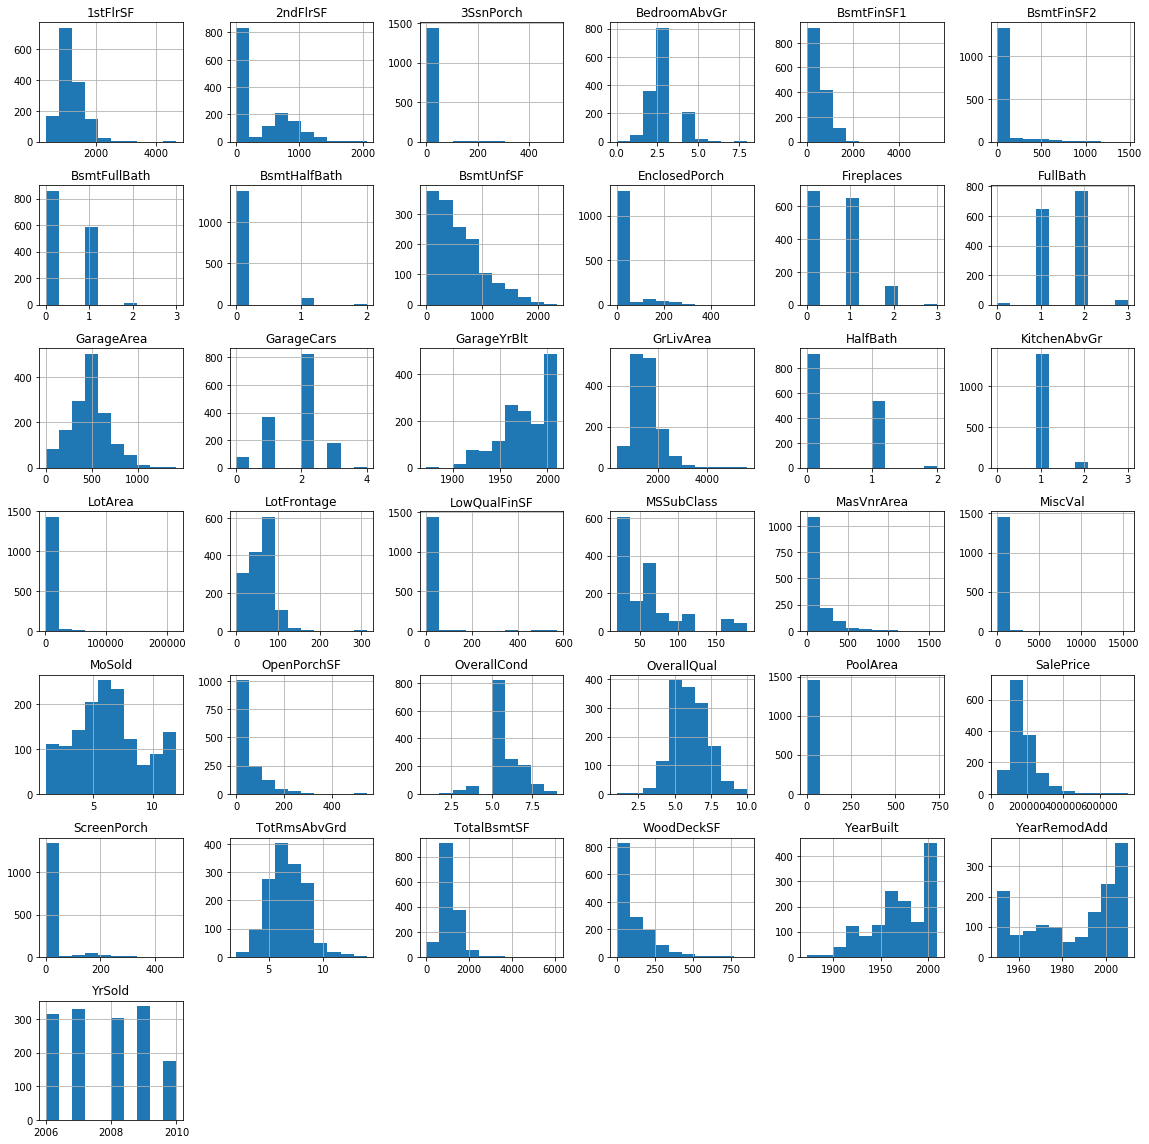

In [55]:
ax = df.hist(figsize=(16, 16))
plt.tight_layout()

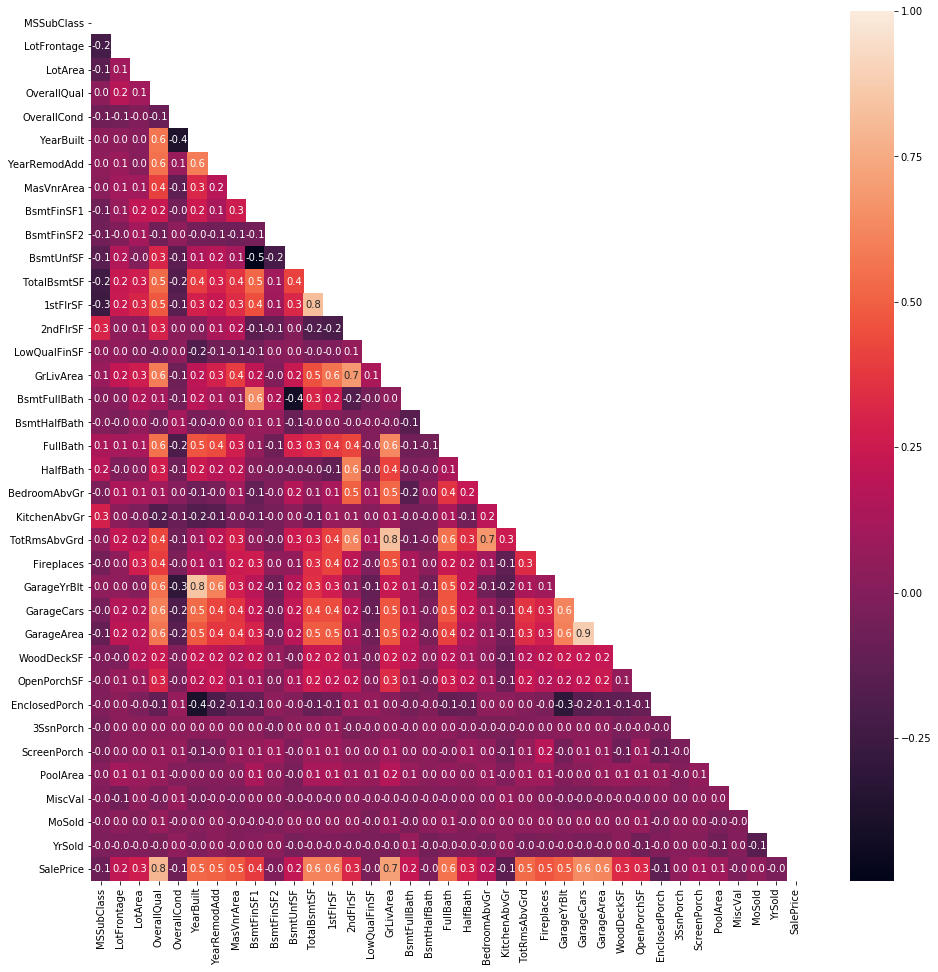

In [60]:
# Посмотрим на корреляцию числовых признаков
corr = df[num_cols].corr()

plt.figure(figsize = (16,16))

mask = np.triu(np.ones((len(corr), len(corr))), k=0)

ax = sns.heatmap(corr, annot=True, mask = mask,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            fmt=".1f"
           )

Цена продажи сильно коррелирует с качеством дома и GrLivArea

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [90]:
correlated_num_cols = corr.loc[corr['SalePrice']>0.5, 'SalePrice'].index

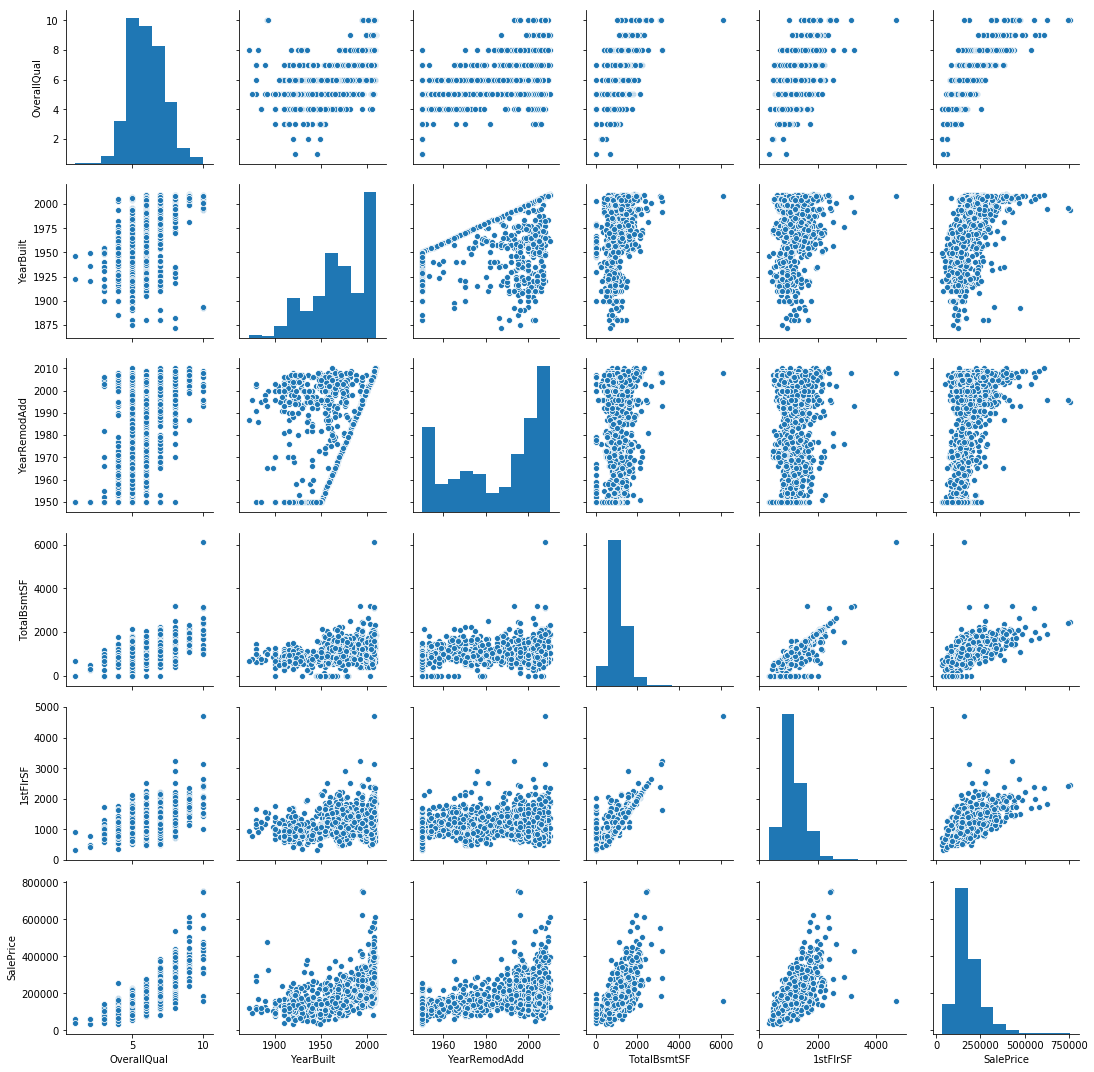

In [94]:
ax = sns.pairplot(data = df, vars=list(correlated_num_cols[:5])+['SalePrice'])

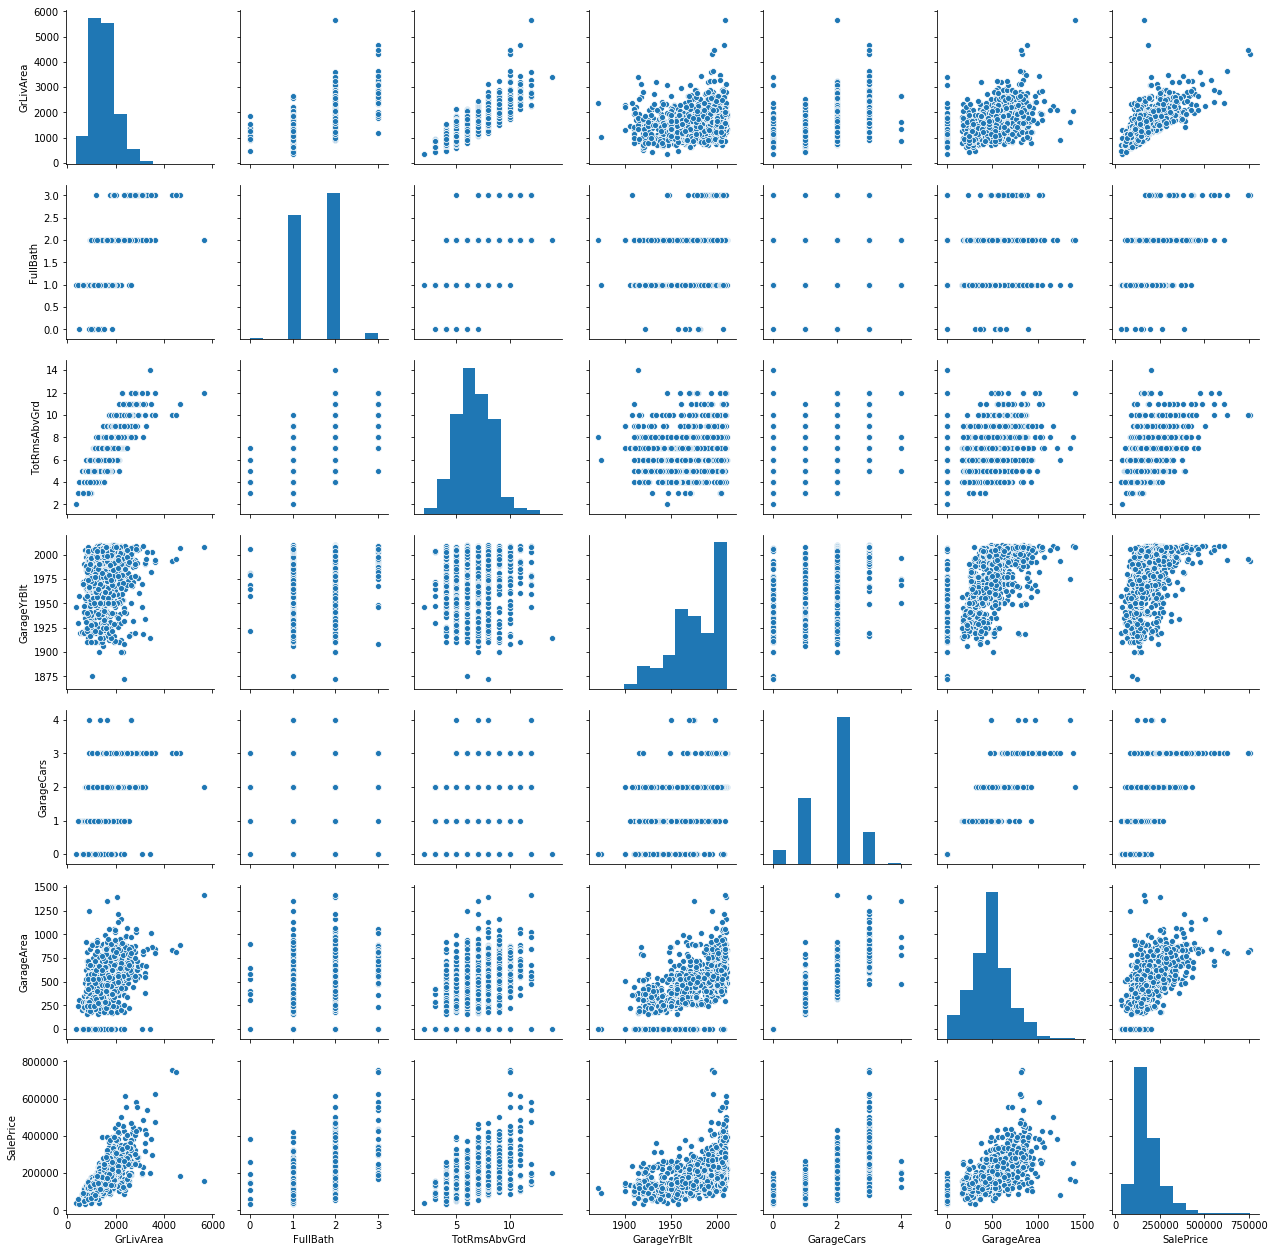

In [96]:
ax = sns.pairplot(data = df, vars=correlated_num_cols[5:])

In [97]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [99]:
X = pd.get_dummies(X, columns=cat_cols)

In [104]:
X.drop([col for col in X.columns if 'to_drop' in col], axis=1, inplace=True)

In [105]:
X.shape

(1460, 285)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

In [145]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error

In [161]:
rfr = RandomForestRegressor(n_estimators=100)
lrg = LinearRegression()
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)
rfr.fit(X_train, y_train)
lrg.fit(X_train_sc, np.log(y_train))
y_pred_rfr = rfr.predict(X_val)
# y_pred_lrg = np.exp(lrg.predict(X_val_sc))

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/sergey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [162]:
mean_squared_log_error(y_val, y_pred_rfr)

0.020466572538539507

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as sts
from sklearn.pipeline import Pipeline
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory

In [142]:
np.random.seed(42)
location = '.\cachedir'
memory = Memory(location)

select_and_predict_pipeline_rfc = Pipeline([
    ('std_scaler', StandardScaler()),
    ('pca', PCA()),
    ('rfc',  RandomForestRegressor())], 
    memory=memory
)

param_distribs_rfc = {
        'pca__n_components': sts.randint(low=5, high=len(X_train.columns)),
        'rfc': [RandomForestRegressor()],
        'rfc__n_estimators': sts.randint(low=20, high=300),
        'rfc__max_depth': sts.randint(low=3, high=20),
        'rfc__max_features': ['auto', 'sqrt'],
        'rfc__min_samples_leaf': sts.randint(low=5, high=20),
        'rfc__min_samples_split': sts.randint(low=10, high=20),
        }

random_search_rfc = RandomizedSearchCV(select_and_predict_pipeline_rfc, 
        param_distributions=param_distribs_rfc,
        n_iter=50, cv=10, scoring='neg_mean_squared_log_error', verbose=10)

In [143]:
random_search_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=122 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s


[CV]  pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=122, score=-0.0313863851912911, total=   6.5s
[CV] pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=Fals

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.3s remaining:    0.0s


[CV]  pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=122, score=-0.046634859204679364, total=   6.8s
[CV] pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.0s remaining:    0.0s


[CV]  pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=122, score=-0.02161349917567259, total=   6.6s
[CV] pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   26.4s remaining:    0.0s


[CV]  pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=122, score=-0.018920412097449213, total=   6.4s
[CV] pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   33.1s remaining:    0.0s


[CV]  pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=122, score=-0.03213139513926254, total=   6.6s
[CV] pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   39.7s remaining:    0.0s


[CV]  pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=122, score=-0.03315822110299459, total=   6.5s
[CV] pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   46.2s remaining:    0.0s


[CV]  pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=122, score=-0.021923040594144454, total=   6.4s
[CV] pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   52.8s remaining:    0.0s
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


[CV]  pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=122, score=-0.030934872386853263, total=   6.6s
[CV] pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   59.6s remaining:    0.0s
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


[CV]  pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=122, score=-0.0196921427586521, total=   6.8s
[CV] pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=107, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=122, score=-0.025661225633383425, total=   6.7s
[CV] pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=122, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=119, score=-0.029742658837548515, total=   7.5s
[CV] pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=119, score=-0.045633841967656213, total=   7.9s
[CV] pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=119, score=-0.02162040533951706, total=   7.7s
[CV] pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=119, score=-0.018791314919767328, total=   7.4s
[CV] pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=119, score=-0.0318301641247073, total=   7.5s
[CV] pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=119, score=-0.03212053255574018, total=   7.3s
[CV] pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=119, score=-0.022199039516509637, total=   7.3s
[CV] pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=119, score=-0.030626713455386808, total=   7.3s
[CV] pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=119, score=-0.019404622581959987, total=   7.6s
[CV] pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=126, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=14, rfc__n_estimators=119, score=-0.024467415053450514, total=   7.6s
[CV] pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=119, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=sqrt, rfc__min_samples_leaf=9, rfc__min_samples_split=11, rfc__n_estimators=211, score=-0.11343676797131771, total=   1.5s
[CV] pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=sqrt, rfc__min_samples_leaf=9, rfc__min_samples_split=11, rfc__n_estimators=211, score=-0.11774923085441695, total=   1.6s
[CV] pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=sqrt, rfc__min_samples_leaf=9, rfc__min_samples_split=11, rfc__n_estimators=211, score=-0.09346577556823113, total=   1.7s
[CV] pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=sqrt, rfc__min_samples_leaf=9, rfc__min_samples_split=11, rfc__n_estimators=211, score=-0.07625614107011158, total=   1.6s
[CV] pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=sqrt, rfc__min_samples_leaf=9, rfc__min_samples_split=11, rfc__n_estimators=211, score=-0.08881607659023733, total=   1.6s
[CV] pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=sqrt, rfc__min_samples_leaf=9, rfc__min_samples_split=11, rfc__n_estimators=211, score=-0.09628103759798667, total=   1.6s
[CV] pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=sqrt, rfc__min_samples_leaf=9, rfc__min_samples_split=11, rfc__n_estimators=211, score=-0.08755686002976003, total=   1.7s
[CV] pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=sqrt, rfc__min_samples_leaf=9, rfc__min_samples_split=11, rfc__n_estimators=211, score=-0.07786469663433206, total=   1.6s
[CV] pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=sqrt, rfc__min_samples_leaf=9, rfc__min_samples_split=11, rfc__n_estimators=211, score=-0.06949247704415971, total=   1.8s
[CV] pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=156, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=sqrt, rfc__min_samples_leaf=9, rfc__min_samples_split=11, rfc__n_estimators=211, score=-0.12084561823511289, total=   1.6s
[CV] pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=211, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=15, rfc__n_estimators=272, score=-0.13884225415283014, total=   1.6s
[CV] pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=15, rfc__n_estimators=272, score=-0.1493570612045154, total=   1.6s
[CV] pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=15, rfc__n_estimators=272, score=-0.12491106538708578, total=   1.6s
[CV] pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=15, rfc__n_estimators=272, score=-0.09741634980856877, total=   1.6s
[CV] pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=15, rfc__n_estimators=272, score=-0.1224410976950967, total=   1.6s
[CV] pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=15, rfc__n_estimators=272, score=-0.12691218610569516, total=   1.6s
[CV] pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=15, rfc__n_estimators=272, score=-0.11243188960665168, total=   1.6s
[CV] pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=15, rfc__n_estimators=272, score=-0.10826827350609294, total=   1.6s
[CV] pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=15, rfc__n_estimators=272, score=-0.09295220175782025, total=   1.6s
[CV] pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=281, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=15, rfc__n_estimators=272, score=-0.1461191485716007, total=   1.5s
[CV] pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=272, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=19, rfc__n_estimators=207, score=-0.030759792069894265, total=  23.1s
[CV] pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=19, rfc__n_estimators=207, score=-0.046716132480462934, total=  23.5s
[CV] pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=19, rfc__n_estimators=207, score=-0.02254940087700372, total=  22.9s
[CV] pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=19, rfc__n_estimators=207, score=-0.01906501775902431, total=  22.6s
[CV] pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=19, rfc__n_estimators=207, score=-0.03130371162881008, total=  22.6s
[CV] pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=19, rfc__n_estimators=207, score=-0.03373280587105441, total=  22.4s
[CV] pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=19, rfc__n_estimators=207, score=-0.023263349719594383, total=  22.1s
[CV] pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=19, rfc__n_estimators=207, score=-0.031257836332866724, total=  21.8s
[CV] pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=19, rfc__n_estimators=207, score=-0.020612252169190614, total=  22.5s
[CV] pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=240, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=19, rfc__n_estimators=207, score=-0.026243230137794584, total=  22.8s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=207, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=16, rfc__n_estimators=263, score=-0.10078023133964653, total=   3.3s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=16, rfc__n_estimators=263, score=-0.10531512563396891, total=   3.4s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=16, rfc__n_estimators=263, score=-0.08069336931990763, total=   3.3s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=16, rfc__n_estimators=263, score=-0.06111892329684904, total=   3.3s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=16, rfc__n_estimators=263, score=-0.07176694011909782, total=   3.4s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=16, rfc__n_estimators=263, score=-0.08805632457714896, total=   3.3s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=16, rfc__n_estimators=263, score=-0.07583251871423659, total=   3.3s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=16, rfc__n_estimators=263, score=-0.0642755639250259, total=   3.3s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=16, rfc__n_estimators=263, score=-0.05615401188983987, total=   3.3s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=17, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=16, rfc__n_estimators=263, score=-0.10874848543463762, total=   3.3s
[CV] pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=263, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=11, rfc__min_samples_split=14, rfc__n_estimators=186, score=-0.029490922244346955, total=  12.1s
[CV] pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=11, rfc__min_samples_split=14, rfc__n_estimators=186, score=-0.0466056154057576, total=  12.2s
[CV] pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=11, rfc__min_samples_split=14, rfc__n_estimators=186, score=-0.021655357500131183, total=  12.2s
[CV] pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=11, rfc__min_samples_split=14, rfc__n_estimators=186, score=-0.019657071190293727, total=  11.9s
[CV] pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=11, rfc__min_samples_split=14, rfc__n_estimators=186, score=-0.031920710278521426, total=  11.8s
[CV] pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=11, rfc__min_samples_split=14, rfc__n_estimators=186, score=-0.032722387405024124, total=  11.9s
[CV] pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=11, rfc__min_samples_split=14, rfc__n_estimators=186, score=-0.02211096801761894, total=  11.9s
[CV] pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=11, rfc__min_samples_split=14, rfc__n_estimators=186, score=-0.03168381248048781, total=  11.9s
[CV] pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=11, rfc__min_samples_split=14, rfc__n_estimators=186, score=-0.020157123918666336, total=  12.0s
[CV] pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=135, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=11, rfc__min_samples_split=14, rfc__n_estimators=186, score=-0.02558781572305225, total=  12.2s
[CV] pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=186, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=11, rfc__n_estimators=284, score=-0.03138383489295453, total=  29.1s
[CV] pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=11, rfc__n_estimators=284, score=-0.04781291352300663, total=  29.4s
[CV] pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=11, rfc__n_estimators=284, score=-0.023450523172022984, total=  29.2s
[CV] pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=11, rfc__n_estimators=284, score=-0.02011036474367365, total=  29.0s
[CV] pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=11, rfc__n_estimators=284, score=-0.03373612714577049, total=  28.9s
[CV] pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=11, rfc__n_estimators=284, score=-0.03329873981294982, total=  28.7s
[CV] pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=11, rfc__n_estimators=284, score=-0.024161765763920907, total=  28.4s
[CV] pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=11, rfc__n_estimators=284, score=-0.03178173330772281, total=  28.3s
[CV] pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=11, rfc__n_estimators=284, score=-0.022058290782463272, total=  28.8s
[CV] pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=278, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=11, rfc__n_estimators=284, score=-0.027633360505499346, total=  28.9s
[CV] pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=284, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=16, rfc__min_samples_split=16, rfc__n_estimators=283, score=-0.1009168854203087, total=   1.1s
[CV] pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=16, rfc__min_samples_split=16, rfc__n_estimators=283, score=-0.11164385023700424, total=   1.1s
[CV] pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=16, rfc__min_samples_split=16, rfc__n_estimators=283, score=-0.08675872962316451, total=   1.1s
[CV] pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=16, rfc__min_samples_split=16, rfc__n_estimators=283, score=-0.06802151530900466, total=   1.1s
[CV] pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=16, rfc__min_samples_split=16, rfc__n_estimators=283, score=-0.08072297480679597, total=   1.1s
[CV] pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=16, rfc__min_samples_split=16, rfc__n_estimators=283, score=-0.09219392934261365, total=   1.1s
[CV] pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=16, rfc__min_samples_split=16, rfc__n_estimators=283, score=-0.08429412921327108, total=   1.1s
[CV] pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=16, rfc__min_samples_split=16, rfc__n_estimators=283, score=-0.06873201589071193, total=   1.1s
[CV] pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=16, rfc__min_samples_split=16, rfc__n_estimators=283, score=-0.06374881744255015, total=   1.1s
[CV] pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=57, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=16, rfc__min_samples_split=16, rfc__n_estimators=283, score=-0.11140745120273272, total=   1.1s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=283, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=8, rfc__min_samples_split=11, rfc__n_estimators=21, score=-0.02715602056311664, total=   0.6s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=8, rfc__min_samples_split=11, rfc__n_estimators=21, score=-0.04732372307165585, total=   0.6s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=8, rfc__min_samples_split=11, rfc__n_estimators=21, score=-0.019548264670511056, total=   0.6s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=8, rfc__min_samples_split=11, rfc__n_estimators=21, score=-0.017847252587551248, total=   0.6s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=8, rfc__min_samples_split=11, rfc__n_estimators=21, score=-0.030525749470473113, total=   0.7s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=8, rfc__min_samples_split=11, rfc__n_estimators=21, score=-0.03216659539695442, total=   0.6s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=8, rfc__min_samples_split=11, rfc__n_estimators=21, score=-0.0225942382482818, total=   0.6s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__ma

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=8, rfc__min_samples_split=11, rfc__n_estimators=21, score=-0.033198690905566694, total=   0.6s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=8, rfc__min_samples_split=11, rfc__n_estimators=21, score=-0.02141536463836229, total=   0.6s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=8, rfc__min_samples_split=11, rfc__n_estimators=21, score=-0.02296908772043585, total=   0.6s
[CV] pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=11, rfc__n_estimators=237, score=-0.06968873411879961, total=   1.4s
[CV] pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=11, rfc__n_estimators=237, score=-0.07942646121395024, total=   1.5s
[CV] pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=11, rfc__n_estimators=237, score=-0.052189832013522515, total=   1.4s
[CV] pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=11, rfc__n_estimators=237, score=-0.03909702950573232, total=   1.4s
[CV] pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=11, rfc__n_estimators=237, score=-0.050818012989249255, total=   1.5s
[CV] pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=11, rfc__n_estimators=237, score=-0.06535884769595353, total=   1.5s
[CV] pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=11, rfc__n_estimators=237, score=-0.052243358270021856, total=   1.4s
[CV] pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=11, rfc__n_estimators=237, score=-0.041953371667544884, total=   1.4s
[CV] pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=11, rfc__n_estimators=237, score=-0.0370177102857344, total=   1.5s
[CV] pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=58, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=11, rfc__n_estimators=237, score=-0.07752420737749373, total=   1.4s
[CV] pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=237, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=13, rfc__n_estimators=289, score=-0.10147926862206086, total=   1.0s
[CV] pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=13, rfc__n_estimators=289, score=-0.11246443997289764, total=   1.0s
[CV] pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=13, rfc__n_estimators=289, score=-0.08826290533832697, total=   1.0s
[CV] pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=13, rfc__n_estimators=289, score=-0.06535803103548374, total=   1.0s
[CV] pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=13, rfc__n_estimators=289, score=-0.07927716564628527, total=   1.1s
[CV] pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=13, rfc__n_estimators=289, score=-0.08720019853543146, total=   1.0s
[CV] pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=13, rfc__n_estimators=289, score=-0.0792603019117, total=   1.1s
[CV] pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__ma

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=13, rfc__n_estimators=289, score=-0.06535865493153398, total=   1.1s
[CV] pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=13, rfc__n_estimators=289, score=-0.06157999138015198, total=   1.0s
[CV] pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=48, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=4, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=13, rfc__n_estimators=289, score=-0.10826347268457231, total=   1.0s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=289, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=11, rfc__min_samples_split=18, rfc__n_estimators=209, score=-0.09981602708891028, total=   2.1s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=11, rfc__min_samples_split=18, rfc__n_estimators=209, score=-0.11179451526422939, total=   2.2s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=11, rfc__min_samples_split=18, rfc__n_estimators=209, score=-0.08349678643349252, total=   2.2s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=11, rfc__min_samples_split=18, rfc__n_estimators=209, score=-0.06602206505422946, total=   2.2s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=11, rfc__min_samples_split=18, rfc__n_estimators=209, score=-0.08195027747668268, total=   2.2s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=11, rfc__min_samples_split=18, rfc__n_estimators=209, score=-0.08835096196230499, total=   2.2s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=11, rfc__min_samples_split=18, rfc__n_estimators=209, score=-0.08159782900679935, total=   2.2s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=11, rfc__min_samples_split=18, rfc__n_estimators=209, score=-0.06773463670023387, total=   2.2s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=11, rfc__min_samples_split=18, rfc__n_estimators=209, score=-0.06050189436611642, total=   2.2s
[CV] pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=275, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=sqrt, rfc__min_samples_leaf=11, rfc__min_samples_split=18, rfc__n_estimators=209, score=-0.1081023103277069, total=   2.2s
[CV] pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=11, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=209, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=18, rfc__max_features=auto, rfc__min_samples_leaf=6, rfc__min_samples_split=14, rfc__n_estimators=299, score=-0.02889288053045243, total=  37.5s
[CV] pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=18, rfc__max_features=auto, rfc__min_samples_leaf=6, rfc__min_samples_split=14, rfc__n_estimators=299, score=-0.04559476229346464, total=  38.1s
[CV] pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=18, rfc__max_features=auto, rfc__min_samples_leaf=6, rfc__min_samples_split=14, rfc__n_estimators=299, score=-0.02114418919293556, total=  37.6s
[CV] pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=18, rfc__max_features=auto, rfc__min_samples_leaf=6, rfc__min_samples_split=14, rfc__n_estimators=299, score=-0.019586932758791333, total=  37.1s
[CV] pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=18, rfc__max_features=auto, rfc__min_samples_leaf=6, rfc__min_samples_split=14, rfc__n_estimators=299, score=-0.02943697499367365, total=  36.9s
[CV] pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=18, rfc__max_features=auto, rfc__min_samples_leaf=6, rfc__min_samples_split=14, rfc__n_estimators=299, score=-0.03270344896508527, total=  36.7s
[CV] pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=18, rfc__max_features=auto, rfc__min_samples_leaf=6, rfc__min_samples_split=14, rfc__n_estimators=299, score=-0.021015952585256483, total=  36.6s
[CV] pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=18, rfc__max_features=auto, rfc__min_samples_leaf=6, rfc__min_samples_split=14, rfc__n_estimators=299, score=-0.02970530765326459, total=  36.3s
[CV] pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=18, rfc__max_features=auto, rfc__min_samples_leaf=6, rfc__min_samples_split=14, rfc__n_estimators=299, score=-0.01965517306980447, total=  37.4s
[CV] pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=217, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=18, rfc__max_features=auto, rfc__min_samples_leaf=6, rfc__min_samples_split=14, rfc__n_estimators=299, score=-0.02536660300029038, total=  37.8s
[CV] pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=299, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=17, rfc__min_samples_split=10, rfc__n_estimators=28, score=-0.031143898202925388, total=   3.1s
[CV] pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=17, rfc__min_samples_split=10, rfc__n_estimators=28, score=-0.046449630974283576, total=   3.1s
[CV] pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=17, rfc__min_samples_split=10, rfc__n_estimators=28, score=-0.02346801895502815, total=   3.2s
[CV] pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=17, rfc__min_samples_split=10, rfc__n_estimators=28, score=-0.02036235429908138, total=   3.0s
[CV] pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=17, rfc__min_samples_split=10, rfc__n_estimators=28, score=-0.033437061303064154, total=   3.1s
[CV] pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=17, rfc__min_samples_split=10, rfc__n_estimators=28, score=-0.036030585268495084, total=   3.1s
[CV] pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=17, rfc__min_samples_split=10, rfc__n_estimators=28, score=-0.023971786891930566, total=   3.0s
[CV] pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=17, rfc__min_samples_split=10, rfc__n_estimators=28, score=-0.03248606504077777, total=   2.9s
[CV] pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=17, rfc__min_samples_split=10, rfc__n_estimators=28, score=-0.022150864393163792, total=   3.1s
[CV] pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=221, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=17, rfc__min_samples_split=10, rfc__n_estimators=28, score=-0.027887861604473853, total=   3.1s
[CV] pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=28, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=12, rfc__min_samples_split=12, rfc__n_estimators=100, score=-0.09028197906347804, total=   1.0s
[CV] pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=12, rfc__min_samples_split=12, rfc__n_estimators=100, score=-0.09634117296474039, total=   1.0s
[CV] pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=12, rfc__min_samples_split=12, rfc__n_estimators=100, score=-0.06648435029379406, total=   1.0s
[CV] pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=12, rfc__min_samples_split=12, rfc__n_estimators=100, score=-0.053877874807421545, total=   1.0s
[CV] pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=12, rfc__min_samples_split=12, rfc__n_estimators=100, score=-0.06760685446525869, total=   1.0s
[CV] pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=12, rfc__min_samples_split=12, rfc__n_estimators=100, score=-0.07780985322040831, total=   1.0s
[CV] pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=12, rfc__min_samples_split=12, rfc__n_estimators=100, score=-0.06622541894134273, total=   1.0s
[CV] pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=12, rfc__min_samples_split=12, rfc__n_estimators=100, score=-0.05809572830780425, total=   1.0s
[CV] pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=12, rfc__min_samples_split=12, rfc__n_estimators=100, score=-0.05073215266536279, total=   1.0s
[CV] pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=133, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=12, rfc__min_samples_split=12, rfc__n_estimators=100, score=-0.09337604397357815, total=   0.9s
[CV] pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=14, rfc__n_estimators=250, score=-0.032746219713417596, total=  16.3s
[CV] pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=14, rfc__n_estimators=250, score=-0.048962208439147795, total=  16.6s
[CV] pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=14, rfc__n_estimators=250, score=-0.025106456622114953, total=  16.4s
[CV] pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=14, rfc__n_estimators=250, score=-0.021780100165769856, total=  16.1s
[CV] pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=14, rfc__n_estimators=250, score=-0.03575225165653022, total=  16.2s
[CV] pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=14, rfc__n_estimators=250, score=-0.0345565865141726, total=  16.1s
[CV] pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=14, rfc__n_estimators=250, score=-0.025332645920234875, total=  16.1s
[CV] pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=14, rfc__n_estimators=250, score=-0.03263704481188738, total=  16.1s
[CV] pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=14, rfc__n_estimators=250, score=-0.022845480486634737, total=  16.2s
[CV] pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=167, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=14, rfc__n_estimators=250, score=-0.02891483667349532, total=  16.3s
[CV] pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=11, rfc__n_estimators=52, score=-0.029409877540016137, total=   1.3s
[CV] pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=11, rfc__n_estimators=52, score=-0.04504938234500856, total=   1.3s
[CV] pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=11, rfc__n_estimators=52, score=-0.02156277138201203, total=   1.3s
[CV] pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=11, rfc__n_estimators=52, score=-0.019634045520935246, total=   1.3s
[CV] pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=11, rfc__n_estimators=52, score=-0.03013087431860374, total=   1.3s
[CV] pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=11, rfc__n_estimators=52, score=-0.0331490944601642, total=   1.3s
[CV] pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__ma

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=11, rfc__n_estimators=52, score=-0.02304304308387756, total=   1.3s
[CV] pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=11, rfc__n_estimators=52, score=-0.030702905250074696, total=   1.2s
[CV] pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=11, rfc__n_estimators=52, score=-0.020315258340827615, total=   1.3s
[CV] pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=45, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=12, rfc__min_samples_split=11, rfc__n_estimators=52, score=-0.02467942524126047, total=   1.3s
[CV] pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=12, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=52, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=17, rfc__n_estimators=233, score=-0.030804641127238918, total=   5.7s
[CV] pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=17, rfc__n_estimators=233, score=-0.0463900722082965, total=   5.7s
[CV] pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=17, rfc__n_estimators=233, score=-0.02186905023878507, total=   5.6s
[CV] pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=17, rfc__n_estimators=233, score=-0.019166563647109752, total=   5.5s
[CV] pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=17, rfc__n_estimators=233, score=-0.03177627483800153, total=   5.5s
[CV] pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=17, rfc__n_estimators=233, score=-0.03341556599958309, total=   5.5s
[CV] pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=17, rfc__n_estimators=233, score=-0.02348582524507098, total=   5.5s
[CV] pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=17, rfc__n_estimators=233, score=-0.030794363091353992, total=   5.5s
[CV] pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=17, rfc__n_estimators=233, score=-0.021394906465438557, total=   5.6s
[CV] pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=52, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=auto, rfc__min_samples_leaf=16, rfc__min_samples_split=17, rfc__n_estimators=233, score=-0.02669946973556842, total=   5.6s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=16, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=233, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=9, rfc__min_samples_split=12, rfc__n_estimators=276, score=-0.0462605906381713, total=   3.2s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=9, rfc__min_samples_split=12, rfc__n_estimators=276, score=-0.06384731984241743, total=   3.2s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=9, rfc__min_samples_split=12, rfc__n_estimators=276, score=-0.03672896652642861, total=   3.2s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=9, rfc__min_samples_split=12, rfc__n_estimators=276, score=-0.028918322328157647, total=   3.2s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=9, rfc__min_samples_split=12, rfc__n_estimators=276, score=-0.04655130645389269, total=   3.2s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=9, rfc__min_samples_split=12, rfc__n_estimators=276, score=-0.04680239515428092, total=   3.1s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=9, rfc__min_samples_split=12, rfc__n_estimators=276, score=-0.034085438982003474, total=   3.1s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=9, rfc__min_samples_split=12, rfc__n_estimators=276, score=-0.04351683307157049, total=   3.1s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=9, rfc__min_samples_split=12, rfc__n_estimators=276, score=-0.02785879597627289, total=   3.2s
[CV] pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=39, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=9, rfc__min_samples_split=12, rfc__n_estimators=276, score=-0.04542428540627943, total=   3.1s
[CV] pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__ma

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=276, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=226, score=-0.028437848716106946, total=   1.3s
[CV] pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=226, score=-0.04572680632464317, total=   1.3s
[CV] pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=226, score=-0.02159788265401925, total=   1.3s
[CV] pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=226, score=-0.01770352521689789, total=   1.4s
[CV] pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=226, score=-0.03121843965068835, total=   1.3s
[CV] pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=226, score=-0.03192657383358089, total=   1.3s
[CV] pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=226, score=-0.02330068237727439, total=   1.3s
[CV] pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=226, score=-0.031528771851242476, total=   1.3s
[CV] pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=226, score=-0.021594635301585147, total=   1.3s
[CV] pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=9, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=16, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=226, score=-0.02438045291458887, total=   1.3s
[CV] pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=16,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=226, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=82, score=-0.056172046228446584, total=   0.4s
[CV] pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=82, score=-0.0681998339714403, total=   0.4s
[CV] pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=82, score=-0.0411722002261834, total=   0.4s
[CV] pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=82, score=-0.03264137520280004, total=   0.4s
[CV] pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=82, score=-0.04389829338271668, total=   0.5s
[CV] pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=82, score=-0.05711446137827469, total=   0.4s
[CV] pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=82, score=-0.03949146377521319, total=   0.4s
[CV] pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=82, score=-0.03785962120141029, total=   0.4s
[CV] pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=82, score=-0.030849710704222516, total=   0.4s
[CV] pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=19, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=12, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=82, score=-0.06930799529382754, total=   0.4s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=82, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=13, rfc__n_estimators=241, score=-0.1043649437877494, total=   2.4s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=13, rfc__n_estimators=241, score=-0.11288459411730767, total=   2.4s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=13, rfc__n_estimators=241, score=-0.08395440271878049, total=   2.5s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=13, rfc__n_estimators=241, score=-0.0662070957476576, total=   2.5s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=13, rfc__n_estimators=241, score=-0.07665746105435829, total=   2.4s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=13, rfc__n_estimators=241, score=-0.09029925181917473, total=   2.5s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=13, rfc__n_estimators=241, score=-0.07773018219212768, total=   2.4s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=13, rfc__n_estimators=241, score=-0.07148316496065535, total=   2.5s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=13, rfc__n_estimators=241, score=-0.06219313825768453, total=   2.5s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=13, rfc__n_estimators=241, score=-0.11211818731021118, total=   2.4s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=241, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=13, rfc__n_estimators=32, score=-0.03189880278666998, total=   3.5s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=13, rfc__n_estimators=32, score=-0.04790016411233056, total=   3.5s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=13, rfc__n_estimators=32, score=-0.023318130419774923, total=   3.5s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=13, rfc__n_estimators=32, score=-0.020185876527704084, total=   3.4s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=13, rfc__n_estimators=32, score=-0.033359059761987976, total=   3.4s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=13, rfc__n_estimators=32, score=-0.034595096400477324, total=   3.4s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=13, rfc__n_estimators=32, score=-0.02376608254832089, total=   3.4s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=13, rfc__n_estimators=32, score=-0.03227489782590313, total=   3.3s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=13, rfc__n_estimators=32, score=-0.021600436810410316, total=   3.5s
[CV] pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=235, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=13, rfc__n_estimators=32, score=-0.029950797027571897, total=   3.5s
[CV] pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=13,
           min_weight_fraction_leaf=0.0, n_estimators=32, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=7, rfc__min_samples_split=15, rfc__n_estimators=85, score=-0.029260729645094935, total=   7.8s
[CV] pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=7, rfc__min_samples_split=15, rfc__n_estimators=85, score=-0.04370264122458237, total=   8.0s
[CV] pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__ma

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=7, rfc__min_samples_split=15, rfc__n_estimators=85, score=-0.020853232884034255, total=   7.9s
[CV] pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=7, rfc__min_samples_split=15, rfc__n_estimators=85, score=-0.01964277453296928, total=   7.9s
[CV] pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__ma

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=7, rfc__min_samples_split=15, rfc__n_estimators=85, score=-0.030028750005819133, total=   7.7s
[CV] pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=7, rfc__min_samples_split=15, rfc__n_estimators=85, score=-0.03218196401193525, total=   7.7s
[CV] pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__ma

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=7, rfc__min_samples_split=15, rfc__n_estimators=85, score=-0.02192476346984858, total=   7.7s
[CV] pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__ma

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=7, rfc__min_samples_split=15, rfc__n_estimators=85, score=-0.031052194835642248, total=   7.7s
[CV] pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=7, rfc__min_samples_split=15, rfc__n_estimators=85, score=-0.019658186184696638, total=   7.8s
[CV] pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=auto, rfc__min_samples_leaf=7, rfc__min_samples_split=15, rfc__n_estimators=85, score=-0.024114185494733452, total=   7.8s
[CV] pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__m

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=15,
           min_weight_fraction_leaf=0.0, n_estimators=85, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=14, rfc__n_estimators=153, score=-0.09175356514170982, total=   1.6s
[CV] pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=14, rfc__n_estimators=153, score=-0.10331716112209842, total=   1.6s
[CV] pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=14, rfc__n_estimators=153, score=-0.07176560418542395, total=   1.6s
[CV] pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=14, rfc__n_estimators=153, score=-0.057987522564201026, total=   1.6s
[CV] pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=14, rfc__n_estimators=153, score=-0.07229700789792358, total=   1.6s
[CV] pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=14, rfc__n_estimators=153, score=-0.08133592436574968, total=   1.6s
[CV] pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=14, rfc__n_estimators=153, score=-0.06866985807723958, total=   1.7s
[CV] pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=14, rfc__n_estimators=153, score=-0.06087839069250617, total=   1.6s
[CV] pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=14, rfc__n_estimators=153, score=-0.055012721618119986, total=   1.6s
[CV] pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=174, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=15, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=14, rfc__n_estimators=153, score=-0.10242014079985456, total=   1.6s
[CV] pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=153, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=8, rfc__min_samples_split=19, rfc__n_estimators=250, score=-0.05604684340827695, total=   1.2s
[CV] pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=8, rfc__min_samples_split=19, rfc__n_estimators=250, score=-0.06646290682728115, total=   1.2s
[CV] pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=8, rfc__min_samples_split=19, rfc__n_estimators=250, score=-0.03859576434150765, total=   1.2s
[CV] pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=8, rfc__min_samples_split=19, rfc__n_estimators=250, score=-0.03238988783590224, total=   1.2s
[CV] pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=8, rfc__min_samples_split=19, rfc__n_estimators=250, score=-0.04171559298269981, total=   1.2s
[CV] pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=8, rfc__min_samples_split=19, rfc__n_estimators=250, score=-0.05341392460875367, total=   1.2s
[CV] pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=8, rfc__min_samples_split=19, rfc__n_estimators=250, score=-0.041650337483107654, total=   1.3s
[CV] pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=8, rfc__min_samples_split=19, rfc__n_estimators=250, score=-0.034359481907699545, total=   1.2s
[CV] pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=8, rfc__min_samples_split=19, rfc__n_estimators=250, score=-0.03080964836294758, total=   1.2s
[CV] pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=32, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=8, rfc__min_samples_split=19, rfc__n_estimators=250, score=-0.06453207843526274, total=   1.2s
[CV] pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=19,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=13, rfc__min_samples_split=18, rfc__n_estimators=135, score=-0.0457133356419454, total=   7.2s
[CV] pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=13, rfc__min_samples_split=18, rfc__n_estimators=135, score=-0.06480952294115744, total=   7.2s
[CV] pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=13, rfc__min_samples_split=18, rfc__n_estimators=135, score=-0.036684963208657266, total=   7.2s
[CV] pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=13, rfc__min_samples_split=18, rfc__n_estimators=135, score=-0.028984618759590512, total=   7.1s
[CV] pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=13, rfc__min_samples_split=18, rfc__n_estimators=135, score=-0.046253793600149015, total=   7.2s
[CV] pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=13, rfc__min_samples_split=18, rfc__n_estimators=135, score=-0.04654795859135776, total=   7.1s
[CV] pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=13, rfc__min_samples_split=18, rfc__n_estimators=135, score=-0.033659424782207965, total=   7.1s
[CV] pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=13, rfc__min_samples_split=18, rfc__n_estimators=135, score=-0.04327588123259277, total=   7.1s
[CV] pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=13, rfc__min_samples_split=18, rfc__n_estimators=135, score=-0.028124358948435305, total=   7.1s
[CV] pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=194, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=13, rfc__min_samples_split=18, rfc__n_estimators=135, score=-0.04762868849785096, total=   7.2s
[CV] pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=156, score=-0.03395913253588569, total=  14.7s
[CV] pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=156, score=-0.04800815022423574, total=  14.8s
[CV] pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=156, score=-0.025105518090694452, total=  14.7s
[CV] pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=156, score=-0.022069791272292787, total=  14.7s
[CV] pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=156, score=-0.03518787132384551, total=  14.7s
[CV] pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=156, score=-0.033999017165232064, total=  14.8s
[CV] pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=156, score=-0.023894052808589326, total=  14.7s
[CV] pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=156, score=-0.032993567002607, total=  14.6s
[CV] pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=156, score=-0.02300686781493464, total=  14.8s
[CV] pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=237, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=5, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=156, score=-0.027688246056631775, total=  14.7s
[CV] pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=156, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=17, rfc__n_estimators=179, score=-0.04593865607415885, total=   8.2s
[CV] pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=17, rfc__n_estimators=179, score=-0.06444091930295481, total=   8.2s
[CV] pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=17, rfc__n_estimators=179, score=-0.03644446607964032, total=   8.2s
[CV] pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=17, rfc__n_estimators=179, score=-0.02875246686182114, total=   8.2s
[CV] pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=17, rfc__n_estimators=179, score=-0.04637307455514882, total=   8.2s
[CV] pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=17, rfc__n_estimators=179, score=-0.04575472467885423, total=   8.2s
[CV] pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=17, rfc__n_estimators=179, score=-0.032970842222944136, total=   8.1s
[CV] pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=17, rfc__n_estimators=179, score=-0.043444870148232895, total=   8.2s
[CV] pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=17, rfc__n_estimators=179, score=-0.028498987257699233, total=   8.2s
[CV] pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=169, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=17, rfc__n_estimators=179, score=-0.045342605159879514, total=   8.2s
[CV] pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=179, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=11, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=71, score=-0.07665055915794958, total=   0.8s
[CV] pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=11, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=71, score=-0.08110012528155762, total=   0.8s
[CV] pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=11, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=71, score=-0.055184032913689396, total=   0.7s
[CV] pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=11, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=71, score=-0.04444949950705726, total=   0.7s
[CV] pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=11, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=71, score=-0.053846681435770996, total=   0.8s
[CV] pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=11, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=71, score=-0.06460153550039728, total=   0.7s
[CV] pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=11, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=71, score=-0.05456747120647097, total=   0.7s
[CV] pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=11, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=71, score=-0.0428355504565147, total=   0.8s
[CV] pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=11, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=71, score=-0.04428104166530447, total=   0.9s
[CV] pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=100, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=11, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=71, score=-0.08690293024633, total=   0.9s
[CV] pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__ma

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=71, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=10, rfc__n_estimators=120, score=-0.10436906341481426, total=   1.5s
[CV] pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=10, rfc__n_estimators=120, score=-0.10702057323443794, total=   1.5s
[CV] pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=10, rfc__n_estimators=120, score=-0.08340043952549452, total=   1.4s
[CV] pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=10, rfc__n_estimators=120, score=-0.06813365253670295, total=   1.5s
[CV] pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=10, rfc__n_estimators=120, score=-0.07437774302498681, total=   1.6s
[CV] pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=10, rfc__n_estimators=120, score=-0.08466958932185152, total=   1.5s
[CV] pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=10, rfc__n_estimators=120, score=-0.07625614329238256, total=   1.5s
[CV] pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=10, rfc__n_estimators=120, score=-0.06997451332982368, total=   1.4s
[CV] pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=10, rfc__n_estimators=120, score=-0.05995929361743533, total=   1.4s
[CV] pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=272, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=7, rfc__min_samples_split=10, rfc__n_estimators=120, score=-0.1106357211110837, total=   1.4s
[CV] pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=11, rfc__n_estimators=149, score=-0.029363873665304244, total=  10.8s
[CV] pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=11, rfc__n_estimators=149, score=-0.044766234443407986, total=  10.9s
[CV] pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=11, rfc__n_estimators=149, score=-0.02029943717774892, total=  10.8s
[CV] pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=11, rfc__n_estimators=149, score=-0.01920194646144572, total=  10.6s
[CV] pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=11, rfc__n_estimators=149, score=-0.029377155406962924, total=  10.6s
[CV] pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=11, rfc__n_estimators=149, score=-0.03170999877159826, total=  10.6s
[CV] pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=11, rfc__n_estimators=149, score=-0.020354470249339715, total=  10.5s
[CV] pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=11, rfc__n_estimators=149, score=-0.031011232321010343, total=  10.4s
[CV] pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=11, rfc__n_estimators=149, score=-0.01863334498401909, total=  10.7s
[CV] pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=117, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=11, rfc__n_estimators=149, score=-0.023560832561867664, total=  10.8s
[CV] pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=11,
           min_weight_fraction_leaf=0.0, n_estimators=149, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=145, score=-0.105510771374723, total=   1.6s
[CV] pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=145, score=-0.11353446334115688, total=   1.6s
[CV] pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=145, score=-0.08811241807552549, total=   1.6s
[CV] pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=145, score=-0.07048162738995457, total=   1.7s
[CV] pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=145, score=-0.08644346646546922, total=   1.6s
[CV] pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=145, score=-0.0936830045709581, total=   1.6s
[CV] pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=145, score=-0.08044858148480181, total=   1.6s
[CV] pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=145, score=-0.0751825445385585, total=   1.6s
[CV] pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=145, score=-0.06293420808079626, total=   1.6s
[CV] pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=224, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=7, rfc__max_features=sqrt, rfc__min_samples_leaf=5, rfc__min_samples_split=10, rfc__n_estimators=145, score=-0.11676141125385381, total=   1.6s
[CV] pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=145, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=16, rfc__n_estimators=222, score=-0.08163956801219253, total=   2.1s
[CV] pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=16, rfc__n_estimators=222, score=-0.09080320923147486, total=   2.1s
[CV] pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=16, rfc__n_estimators=222, score=-0.06874152517992385, total=   2.0s
[CV] pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=16, rfc__n_estimators=222, score=-0.05361555660065298, total=   2.0s
[CV] pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=16, rfc__n_estimators=222, score=-0.06848476238133971, total=   2.0s
[CV] pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=16, rfc__n_estimators=222, score=-0.07462794823390285, total=   2.0s
[CV] pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=16, rfc__n_estimators=222, score=-0.0623555766383362, total=   2.0s
[CV] pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=16, rfc__n_estimators=222, score=-0.05386682511270483, total=   2.0s
[CV] pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=16, rfc__n_estimators=222, score=-0.047102114174729225, total=   2.0s
[CV] pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=134, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=14, rfc__max_features=sqrt, rfc__min_samples_leaf=10, rfc__min_samples_split=16, rfc__n_estimators=222, score=-0.09117693669077391, total=   2.0s
[CV] pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=16,
           min_weight_fraction_leaf=0.0, n_estimators=222, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=117, score=-0.030716970920269027, total=  11.6s
[CV] pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=117, score=-0.04488209401448182, total=  11.7s
[CV] pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=117, score=-0.022031927079393186, total=  11.7s
[CV] pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=117, score=-0.01862888562596069, total=  11.3s
[CV] pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=117, score=-0.030840171548138708, total=  11.4s
[CV] pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=117, score=-0.032132200742608946, total=  11.3s
[CV] pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=117, score=-0.022063060767995312, total=  11.4s
[CV] pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=117, score=-0.03124006225006043, total=  11.1s
[CV] pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=117, score=-0.020114753905968945, total=  11.5s
[CV] pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=188, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=19, rfc__max_features=auto, rfc__min_samples_leaf=10, rfc__min_samples_split=17, rfc__n_estimators=117, score=-0.024538289705762207, total=  11.5s
[CV] pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=19,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=17,
           min_weight_fraction_leaf=0.0, n_estimators=117, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=18, rfc__n_estimators=143, score=-0.02933374157598182, total=  16.8s
[CV] pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=18, rfc__n_estimators=143, score=-0.04475373734777515, total=  17.1s
[CV] pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=18, rfc__n_estimators=143, score=-0.0208340484704478, total=  16.8s
[CV] pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=18, rfc__n_estimators=143, score=-0.019086166216077987, total=  16.6s
[CV] pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=18, rfc__n_estimators=143, score=-0.0301930958569217, total=  16.7s
[CV] pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=18, rfc__n_estimators=143, score=-0.032368637902393874, total=  16.7s
[CV] pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=18, rfc__n_estimators=143, score=-0.02124384811997061, total=  16.4s
[CV] pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=18, rfc__n_estimators=143, score=-0.03107409880002828, total=  16.2s
[CV] pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=18, rfc__n_estimators=143, score=-0.01893507589508073, total=  16.8s
[CV] pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=202, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=13, rfc__max_features=auto, rfc__min_samples_leaf=5, rfc__min_samples_split=18, rfc__n_estimators=143, score=-0.024769518061108397, total=  17.1s
[CV] pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=143, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=8, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=167, score=-0.10514197825528718, total=   1.6s
[CV] pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=8, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=167, score=-0.11138887803701329, total=   1.6s
[CV] pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=8, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=167, score=-0.08682152148315166, total=   1.5s
[CV] pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=8, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=167, score=-0.0686847596486463, total=   1.6s
[CV] pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=8, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=167, score=-0.07955667705944511, total=   1.6s
[CV] pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=8, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=167, score=-0.09148402123206063, total=   1.6s
[CV] pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=8, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=167, score=-0.08154317110887821, total=   1.5s
[CV] pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=8, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=167, score=-0.07234691790531007, total=   1.6s
[CV] pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=8, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=167, score=-0.06419915078089918, total=   1.6s
[CV] pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=191, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=8, rfc__max_features=sqrt, rfc__min_samples_leaf=17, rfc__min_samples_split=12, rfc__n_estimators=167, score=-0.11130756095995673, total=   1.6s
[CV] pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=17, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=167, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=12, rfc__n_estimators=166, score=-0.030470556044515693, total=  17.3s
[CV] pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=12, rfc__n_estimators=166, score=-0.04718242717600024, total=  17.6s
[CV] pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=12, rfc__n_estimators=166, score=-0.02282598317942583, total=  17.2s
[CV] pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=12, rfc__n_estimators=166, score=-0.020108756821382523, total=  17.1s
[CV] pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=12, rfc__n_estimators=166, score=-0.03289532026735929, total=  17.1s
[CV] pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=12, rfc__n_estimators=166, score=-0.03372475008291931, total=  17.1s
[CV] pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=12, rfc__n_estimators=166, score=-0.02361289140065837, total=  16.8s
[CV] pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=12, rfc__n_estimators=166, score=-0.03175756914539909, total=  16.8s
[CV] pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=12, rfc__n_estimators=166, score=-0.021491094865926832, total=  17.2s
[CV] pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=256, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=6, rfc__max_features=auto, rfc__min_samples_leaf=14, rfc__min_samples_split=12, rfc__n_estimators=166, score=-0.0273421778616338, total=  17.2s
[CV] pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=166, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=10, rfc__n_estimators=147, score=-0.09112738459729346, total=   1.4s
[CV] pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=10, rfc__n_estimators=147, score=-0.10504087485898063, total=   1.5s
[CV] pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=10, rfc__n_estimators=147, score=-0.07560298579533069, total=   1.4s
[CV] pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=10, rfc__n_estimators=147, score=-0.05767469033653211, total=   1.4s
[CV] pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=10, rfc__n_estimators=147, score=-0.07213360618524994, total=   1.4s
[CV] pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=10, rfc__n_estimators=147, score=-0.0833107753989312, total=   1.4s
[CV] pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=10, rfc__n_estimators=147, score=-0.07241974259968247, total=   1.4s
[CV] pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=10, rfc__n_estimators=147, score=-0.060809190575088386, total=   1.4s
[CV] pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=10, rfc__n_estimators=147, score=-0.054265779249555356, total=   1.4s
[CV] pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=152, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=13, rfc__min_samples_split=10, rfc__n_estimators=147, score=-0.10520885161803563, total=   1.4s
[CV] pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=13, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=147, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=170, score=-0.029844186795466614, total=   3.7s
[CV] pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=170, score=-0.046196367695372456, total=   3.7s
[CV] pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=170, score=-0.021606482082970967, total=   3.6s
[CV] pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=170, score=-0.018676852757100026, total=   3.6s
[CV] pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=170, score=-0.030956628071189964, total=   3.6s
[CV] pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=170, score=-0.03279781723913453, total=   3.7s
[CV] pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=170, score=-0.02327555987516671, total=   3.5s
[CV] pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=170, score=-0.0314509620305002, total=   3.5s
[CV] pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), r

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=170, score=-0.020685173208066635, total=   3.6s
[CV] pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=43, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=10, rfc__max_features=auto, rfc__min_samples_leaf=15, rfc__min_samples_split=18, rfc__n_estimators=170, score=-0.02466561667716997, total=   3.7s
[CV] pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=18, rfc__n_estimators=79, score=-0.08300570923927111, total=   0.7s
[CV] pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=18, rfc__n_estimators=79, score=-0.09729945505515114, total=   0.7s
[CV] pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=18, rfc__n_estimators=79, score=-0.06596357975122544, total=   0.7s
[CV] pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=18, rfc__n_estimators=79, score=-0.04914621723129732, total=   0.7s
[CV] pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=18, rfc__n_estimators=79, score=-0.0685984226046909, total=   0.7s
[CV] pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=18, rfc__n_estimators=79, score=-0.08003680328181995, total=   0.7s
[CV] pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=18, rfc__n_estimators=79, score=-0.06440861265492187, total=   0.7s
[CV] pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=18, rfc__n_estimators=79, score=-0.05478189293435491, total=   0.7s
[CV] pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=18, rfc__n_estimators=79, score=-0.052923805112578645, total=   0.7s
[CV] pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=103, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=9, rfc__max_features=sqrt, rfc__min_samples_leaf=14, rfc__min_samples_split=18, rfc__n_estimators=79, score=-0.098032305241546, total=   0.7s
[CV] pca__n_components=6, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=6, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=14, min_samples_split=18,
           min_weight_fraction_leaf=0.0, n_estimators=79, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=14, rfc__n_estimators=56, score=-0.07609534314939775, total=   0.2s
[CV] pca__n_components=6, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=6, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=14, rfc__n_estimators=56, score=-0.08942626173627022, total=   0.2s
[CV] pca__n_components=6, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=6, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=14, rfc__n_estimators=56, score=-0.0658204221782385, total=   0.2s
[CV] pca__n_components=6, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=6, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=14, rfc__n_estimators=56, score=-0.04535964337941622, total=   0.2s
[CV] pca__n_components=6, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 
array([[ 0.790002, ..., -0.302293],
       ...,
       [-0.631325, ..., -0.302293]]), 
921     145900
520     106250
401     164990
280     228500
1401    193000
131     244000
808     159950
1249    119000
1083    160000
613     147000
215     134450
135     174000
634     144000
446     190000
625     160000
298     175000
1336    135000
525     176000
629     168500
1283    139000
711     102776
776     221500
195     148500
1325     55000
1289    281000
1106    179900
1429    182900
598     217500
1188    195000
1071    154000
945     124900
414     228000
985     125000
58      438780
790     160200
1426    271000
239     113000
671     103600
1176    119500
720     275000
1374    250000
27      306000
404     

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


________________________________________________fit_transform_one - 0.1s, 0.0min
[CV]  pca__n_components=6, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=14, rfc__n_estimators=56, score=-0.04845937628863242, total=   0.2s
[CV] pca__n_components=6, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
    

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


________________________________________________fit_transform_one - 0.1s, 0.0min
[CV]  pca__n_components=6, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=14, rfc__n_estimators=56, score=-0.04235934902031929, total=   0.2s
[CV] pca__n_components=6, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
    

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


________________________________________________fit_transform_one - 0.1s, 0.0min
[CV]  pca__n_components=6, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=3, rfc__max_features=sqrt, rfc__min_samples_leaf=18, rfc__min_samples_split=14, rfc__n_estimators=56, score=-0.10592389303275418, total=   0.2s
[CV] pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
  

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=18, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=56, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=11, rfc__max_features=auto, rfc__min_samples_leaf=7, rfc__min_samples_split=12, rfc__n_estimators=227, score=-0.02911536187576039, total=  20.9s
[CV] pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=227, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rf

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=227, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=11, rfc__max_features=auto, rfc__min_samples_leaf=7, rfc__min_samples_split=12, rfc__n_estimators=227, score=-0.044327753378544124, total=  22.1s
[CV] pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=227, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/home/sergey/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[CV]  pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=227, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rfc__max_depth=11, rfc__max_features=auto, rfc__min_samples_leaf=7, rfc__min_samples_split=12, rfc__n_estimators=227, score=-0.020551861751819996, total=  22.0s
[CV] pca__n_components=164, rfc=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=227, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False), 

KeyboardInterrupt: 